# Data Preprocessing and EDA

## 1. Data Loading

In [94]:
import pandas as pd

# Dono files ko load karo
df1 = pd.read_csv("BO_2013_1.csv")
df2 = pd.read_csv("BO_2013_2.csv")

# Column names check karna
print("Columns in File 1:", df1.columns)
print("Columns in File 2:", df2.columns)

# Dono dataframes ko merge karo
merged_df = pd.concat([df1, df2], ignore_index=True)

print("Columns in Merged Data Frame:", merged_df.columns)


Columns in File 1: Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA',
       'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE', 'LONGITUDE', 'CIDADE',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1', 'DESCR_TIPO_PESSOA',
       'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR', 'DESCR_PROFISSAO',
       'DESCR_GRAU_INSTRUCAO'],
      dtype='object')
Columns in File 2: Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'ANO', 'MES',
       'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA',
       'DESDOBRAMENTO', 'CONDUTA', 'LATITUDE', 'LONGITUDE', 'CIDADE',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1', 'DESCR

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910420 entries, 0 to 1910419
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NUM_BO                  int64  
 1   ANO_BO                  int64  
 2   ID_DELEGACIA            int64  
 3   NOME_DEPARTAMENTO       object 
 4   NOME_SECCIONAL          object 
 5   DELEGACIA               object 
 6   NOME_DEPARTAMENTO_CIRC  object 
 7   NOME_SECCIONAL_CIRC     object 
 8   NOME_DELEGACIA_CIRC     object 
 9   ANO                     int64  
 10  MES                     int64  
 11  DATA_OCORRENCIA_BO      object 
 12  HORA_OCORRENCIA_BO      object 
 13  FLAG_STATUS             object 
 14  RUBRICA                 object 
 15  DESDOBRAMENTO           object 
 16  CONDUTA                 object 
 17  LATITUDE                object 
 18  LONGITUDE               object 
 19  CIDADE                  object 
 20  LOGRADOURO              object 
 21  NUMERO_LOGRADOURO       object 

In [49]:
print(merged_df.describe())

             NUM_BO        ANO_BO  ID_DELEGACIA        ANO           MES  \
count  1.910420e+06  1.910420e+06  1.910420e+06  1910420.0  1.910420e+06   
mean   8.344083e+04  2.013012e+03  1.095244e+05     2013.0  6.544079e+00   
std    2.620763e+05  1.235982e-01  2.611814e+05        0.0  3.303362e+00   
min    1.000000e+00  2.013000e+03  1.000400e+04     2013.0  1.000000e+00   
25%    1.895000e+03  2.013000e+03  1.033600e+04     2013.0  4.000000e+00   
50%    4.323000e+03  2.013000e+03  2.022400e+04     2013.0  6.000000e+00   
75%    8.303000e+03  2.013000e+03  3.030400e+04     2013.0  9.000000e+00   
max    1.646824e+06  2.017000e+03  9.900020e+05     2013.0  1.200000e+01   

        CONT_PESSOA  IDADE_PESSOA  
count  1.910273e+06  1.424309e+06  
mean   2.214447e+00  3.410463e+01  
std    1.723043e+00  1.392959e+01  
min    1.000000e+00 -6.000000e+00  
25%    1.000000e+00  2.500000e+01  
50%    2.000000e+00  3.200000e+01  
75%    3.000000e+00  4.200000e+01  
max    8.100000e+01  6.0100

In [50]:
df1.shape

(866691, 30)

In [51]:
df2.shape

(1043729, 30)

In [52]:
merged_df.shape

(1910420, 30)

## 2. Data Cleaning

In [95]:
# Column name mapping (Portuguese -> English)
column_mapping = {
    "NUM_BO": "Incident_Report_Number",
    "ANO_BO": "Year_of_Crime",
    "ID_DELEGACIA": "Police_Station_ID",
    "NOME_DEPARTAMENTO": "Department_Name",
    "NOME_SECCIONAL": "Sectional_Police_Station",
    "DELEGACIA": "Police_Station_Name",
    "NOME_DEPARTAMENTO_CIRC": "Jurisdiction_Department",
    "NOME_SECCIONAL_CIRC": "Jurisdiction_Sectional",
    "NOME_DELEGACIA_CIRC": "Jurisdiction_Police_Station",
    "ANO": "Year",
    "MES": "Month",
    "DATA_OCORRENCIA_BO": "Crime_Date",
    "HORA_OCORRENCIA_BO": "Crime_Time",
    "FLAG_STATUS": "Case_Status",
    "RUBRICA": "Legal_Classification",
    "DESDOBRAMENTO": "Case_Developments",
    "CONDUTA": "Crime_Behavior",
    "LATITUDE": "Latitude",
    "LONGITUDE": "Longitude",
    "CIDADE": "City",
    "LOGRADOURO": "Street",
    "NUMERO_LOGRADOURO": "Street_Number",
    "DESCR_TIPO_PESSOA": "Person_Role",
    "CONT_PESSOA": "Person_Count",
    "SEXO_PESSOA": "Gender",
    "IDADE_PESSOA": "Age",
    "COR": "Skin_Color",
    "DESCR_PROFISSAO": "Profession",
    "DESCR_GRAU_INSTRUCAO": "Education_Level",
}

# Column names rename karo
merged_df.rename(columns=column_mapping, inplace=True)
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Year,...,Street,Street_Number,FLAG_STATUS.1,Person_Role,Person_Count,Gender,Age,Skin_Color,Profession,Education_Level
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,2013,...,R JACEGUAI,550,C,Indiciado,4.0,M,27.0,Parda,DESEMPREGADO(A),2 Grau completo
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,2013,...,R MANOEL GUILHERME DOS REIS,641,C,Vítima,1.0,M,62.0,Parda,APOSENTADO(A),1 Grau completo
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,2013,...,R TRES DE MAIO,264,C,Autor,2.0,M,32.0,Branca,ENFERMEIRO(A),Superior completo
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,2013,...,R LEOPOLDO COUTO DE MAGALHAES JR,NaN,C,Testemunha,6.0,M,66.0,Branca,CONTADOR(A),Superior completo
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,2013,...,R JOAO AMARO,439,C,Vítima,3.0,M,60.0,Amarela,ENGENHEIRO CIVIL,Superior completo


### 2.1 Handle missing values

In [96]:
# Function to count "Informação restrita" and NaN values in each column
def count_restricted_and_nan(df):
    restricted_values = "Informação restrita (art. 31 da LAI)"

    results = {}
    for col in df.columns:
        restricted_count = (df[col] == restricted_values).sum()
        nan_count = df[col].isna().sum()
        total_missing = restricted_count + nan_count  # Total missing values

        results[col] = {
            "Restricted Count": restricted_count,
            "NaN Count": nan_count,
            "Total Missing": total_missing
        }

    return results

# Get counts for all columns
restricted_nan_counts = count_restricted_and_nan(merged_df)

# Convert to DataFrame for better visualization
restricted_nan_df = pd.DataFrame.from_dict(restricted_nan_counts, orient="index")

# Display results
print(restricted_nan_df)


                             Restricted Count  NaN Count  Total Missing
Incident_Report_Number                      0          0              0
Year_of_Crime                               0          0              0
Police_Station_ID                           0          0              0
Department_Name                             0          0              0
Sectional_Police_Station                    0          0              0
Police_Station_Name                         0          0              0
Jurisdiction_Department                     0          0              0
Jurisdiction_Sectional                      0          0              0
Jurisdiction_Police_Station                 0          0              0
Year                                        0          0              0
Month                                       0          0              0
Crime_Date                                  0       9688           9688
Crime_Time                                  0     340570        

In [55]:
# Group by Crime_Month and count NaN values in each column
month_wise_missing = merged_df.groupby("Month").apply(lambda x: x.isna().sum())

# Display results
print(month_wise_missing)

       Incident_Report_Number  Year_of_Crime  Police_Station_ID  \
Month                                                             
1                           0              0                  0   
2                           0              0                  0   
3                           0              0                  0   
4                           0              0                  0   
5                           0              0                  0   
6                           0              0                  0   
7                           0              0                  0   
8                           0              0                  0   
9                           0              0                  0   
10                          0              0                  0   
11                          0              0                  0   
12                          0              0                  0   

       Department_Name  Sectional_Police_Station  Police_Stat

In [97]:
# Define restricted value
restricted_value = "Informação restrita (art. 31 da LAI)"

# Remove rows where any column contains this restricted value
merged_df = merged_df[~merged_df.isin([restricted_value]).any(axis=1)]

# Reset index after removal
merged_df.reset_index(drop=True, inplace=True)

# Check the new shape
print(merged_df.shape)

(1850037, 30)


In [98]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)

batch_size = 100000  # Adjust karo apni RAM ke hisaab se
columns_to_impute = ["Latitude", "Longitude"]  # Sirf required columns

for start in range(0, len(merged_df), batch_size):
    end = min(start + batch_size, len(merged_df))  # Ensure end index is within range
    
    # Batch-wise imputation
    merged_df.iloc[start:end, merged_df.columns.get_indexer(columns_to_impute)] = knn_imputer.fit_transform(
        merged_df.iloc[start:end, merged_df.columns.get_indexer(columns_to_impute)]
    )

In [99]:
# Count NaN values in "Crime_Behavior" for each month
crime_behavior_missing = merged_df.groupby("Month")["Crime_Behavior"].apply(lambda x: x.isna().sum())

# Display results
print(crime_behavior_missing)

Month
1     36359
2     38590
3     44039
4     40507
5     41240
6     74266
7     34508
8     38744
9     37578
10    38851
11    39572
12    39753
Name: Crime_Behavior, dtype: int64


In [100]:
# Fill missing values in "Crime_Behavior" with "Unknown"
merged_df["Crime_Behavior"].fillna("Unknown", inplace=True)


In [101]:
mode_value = merged_df["Street_Number"].mode()[0]
merged_df["Street_Number"].fillna(mode_value, inplace=True)

In [102]:
# Check if missing Crime_Time is related to missing Crime_Date
missing_time_with_missing_date = merged_df[merged_df["Crime_Date"].isna() & merged_df["Crime_Time"].isna()]
print(f"Rows where both Crime_Date and Crime_Time are missing: {missing_time_with_missing_date.shape[0]}")

# Check distribution of available Crime_Time values
merged_df["Crime_Time"].value_counts().head(10)  # Show most common times


Rows where both Crime_Date and Crime_Time are missing: 7741


Crime_Time
21:00    34948
20:00    34947
22:00    32223
19:00    30541
20:30    30026
21:30    27975
19:30    27495
23:00    26529
22:30    24798
15:00    24472
Name: count, dtype: int64

In [103]:
# Drop rows where both are missing (if needed)
merged_df = merged_df[~(merged_df["Crime_Date"].isna() & merged_df["Crime_Time"].isna())]

In [104]:
# Fill missing Crime_Time with most frequent time for the same Crime_Behavior
merged_df["Crime_Time"] = merged_df["Crime_Time"].fillna(
    merged_df.groupby("Crime_Behavior")["Crime_Time"].transform(lambda x: x.mode()[0] if not x.mode().empty else merged_df["Crime_Time"].mode()[0])
)

In [107]:
import pandas as pd

# Ensure Crime_Date is in datetime format
merged_df["Crime_Date"] = pd.to_datetime(merged_df["Crime_Date"], errors="coerce")

# Ensure Year & Month are in integer format
merged_df["Year"] = pd.to_numeric(merged_df["Year"], errors="coerce").astype("Int64")
merged_df["Month"] = pd.to_numeric(merged_df["Month"], errors="coerce").astype("Int64")

# Fill missing Crime_Date using Year & Month
missing_date_mask = merged_df["Crime_Date"].isna()

merged_df.loc[missing_date_mask, "Crime_Date"] = merged_df.loc[missing_date_mask].apply(
    lambda row: pd.to_datetime(f"{row['Year']}-{row['Month']:02d}-01", errors="coerce")
    if not pd.isna(row["Year"]) and not pd.isna(row["Month"])
    else pd.NaT,  # Keep NaT for missing values
    axis=1
)

# Count rows before dropping NaT
before_drop = len(merged_df)

# Drop rows where Crime_Date is still NaT
merged_df.dropna(subset=["Crime_Date"], inplace=True)

# Count rows after dropping NaT
after_drop = len(merged_df)

# Number of deleted rows
deleted_rows = before_drop - after_drop

# Reset index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Print the result
print(f"Deleted {deleted_rows} rows due to missing Crime_Date.")


Deleted 0 rows due to missing Crime_Date.


In [110]:
from sklearn.impute import KNNImputer

# Fill missing 'Person_Role' with most frequent value (Mode)
most_frequent_role = merged_df["Person_Role"].mode()[0]
merged_df["Person_Role"].fillna(most_frequent_role, inplace=True)

# KNN Imputation for 'Person_Count'
knn_imputer = KNNImputer(n_neighbors=5)  # Use k=5
merged_df["Person_Count"] = knn_imputer.fit_transform(merged_df[["Person_Count"]])

# Convert 'Person_Count' to integer if needed
merged_df["Person_Count"] = merged_df["Person_Count"].astype(int)

most_frequent_gender = merged_df["Gender"].mode()[0]
merged_df["Gender"].fillna(most_frequent_gender, inplace=True)

In [111]:
import pandas as pd
import numpy as np

# Select relevant columns
impute_cols = ["Age", "Skin_Color", "Profession", "Education_Level"]

# Step 1: Print Unique Values Before Imputation
for col in impute_cols:
    unique_values = merged_df[col].dropna().unique()
    print(f" Unique values in '{col}': {unique_values}\n")

# Step 2: Fill Missing Values with Random Unique Values
for col in impute_cols:
    unique_values = merged_df[col].dropna().unique()  # Get unique non-null values
    merged_df[col] = merged_df[col].apply(lambda x: np.random.choice(unique_values) if pd.isna(x) else x)

print("\n Random Unique Value Imputation Completed!")
print(merged_df[impute_cols].isna().sum())  # Verify missing values

 Unique values in 'Age': [ 27.  62.  32.  66.  60.  34.  22.  39.  29.  77.  21.  30.  28.  25.
  41.  19.  72.  24.  26.  31.  52.  38.  65.  37.  61.  42.  45.  46.
  18.  33.  49.  16.  23.  47.  40.  20.  58.  17.  44.  36.  53.  63.
  35.  54.  57.  59.  43.  51.  13.  56. 113.  15.  48.  85.  68.  14.
  50.  75.  82.  84.  80.  73.  12.  69.  55.   5.   8.   0.   7.   6.
   4.  64.  79.  67.  76.  10.  74.  70.  71.   9.   1.  81.  78.   2.
  11.  83.   3.  87. 170.  93.  88.  86.  92.  94.  91.  90.  89.  97.
 107. 175. 152. 333.  99. 106. 160. 180. 339. 178. 118.  98.  95. 103.
 230. 260. 135. 130. 114.  96. 216. 131. 117. 120. 112. 121. 261. 145.
 125. 115. 104. 144. 219. 129. 161. 148. 138. 122. 116. 101. 124. 156.
 601. 223. 128. 123. 105. 134. 238.  -6. 119. 226. 153. 201. 301. 185.
 100. 168. 215. 137. 234. 109. 158. 142. 127. 220. 218. 236. 221. 132.]

 Unique values in 'Skin_Color': ['Parda               ' 'Branca              ' 'Amarela             '
 'Outros           

In [112]:
# Remove the 'Case_Developments' column
merged_df.drop(columns=["Case_Developments"], inplace=True)

In [113]:
# Har column ki missing values count karo
missing_values = merged_df.isnull().sum()

# Print karo
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Incident_Report_Number         0
Year_of_Crime                  0
Police_Station_ID              0
Department_Name                0
Sectional_Police_Station       0
Police_Station_Name            0
Jurisdiction_Department        0
Jurisdiction_Sectional         0
Jurisdiction_Police_Station    0
Year                           0
Month                          0
Crime_Date                     0
Crime_Time                     0
Case_Status                    0
Legal_Classification           0
Crime_Behavior                 0
Latitude                       0
Longitude                      0
City                           0
Street                         0
Street_Number                  0
FLAG_STATUS.1                  5
Person_Role                    0
Person_Count                   0
Gender                         0
Age                            0
Skin_Color                     0
Profession                     0
Education_Level                0
dtype: int64

In [114]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Year,...,Street,Street_Number,FLAG_STATUS.1,Person_Role,Person_Count,Gender,Age,Skin_Color,Profession,Education_Level
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,2013,...,R JACEGUAI,550,C,Indiciado,4,M,27.0,Parda,DESEMPREGADO(A),2 Grau completo
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,2013,...,R MANOEL GUILHERME DOS REIS,641,C,Vítima,1,M,62.0,Parda,APOSENTADO(A),1 Grau completo
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,2013,...,R TRES DE MAIO,264,C,Autor,2,M,32.0,Branca,ENFERMEIRO(A),Superior completo
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,2013,...,R LEOPOLDO COUTO DE MAGALHAES JR,0,C,Testemunha,6,M,66.0,Branca,CONTADOR(A),Superior completo
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,2013,...,R JOAO AMARO,439,C,Vítima,3,M,60.0,Amarela,ENGENHEIRO CIVIL,Superior completo


### 2.2 Remove duplicate rows

In [116]:
import pandas as pd

# Duplicate rows ka count nikalo
duplicate_count = merged_df.duplicated().sum()

# Duplicates remove karo
merged_df = merged_df.drop_duplicates()

# Duplicate removal ka summary print karo
print(f"Duplicate rows found and removed: {duplicate_count}")
print(f"Total rows after cleaning: {len(merged_df)}")

Duplicate rows found and removed: 53513
Total rows after cleaning: 1788783


In [117]:
merged_df.shape

(1788783, 29)

In [146]:
print("Missing values in Crime_Time:", merged_df["Crime_Time"].isna().sum())
print("Unique Crime_Time values:", merged_df["Crime_Time"].nunique())
print("\nMost Frequent Crime_Time values:\n", merged_df["Crime_Time"].value_counts().head(10))

Missing values in Crime_Time: 0
Unique Crime_Time values: 1440

Most Frequent Crime_Time values:
 Crime_Time
14:00:00    188374
21:00:00     87594
19:00:00     59539
22:00:00     57509
20:00:00     56181
20:30:00     35485
21:30:00     27429
19:30:00     26568
23:00:00     25817
22:30:00     24123
Name: count, dtype: int64


In [123]:
# Save Crime_Time column to CSV
merged_df[["Crime_Time"]].to_csv("Crime_Time_Check.csv", index=False)

### 2.3 Fix Data Types

In [119]:
# Check data types of all columns
print(merged_df.dtypes)

Incident_Report_Number                  int64
Year_of_Crime                           int64
Police_Station_ID                       int64
Department_Name                        object
Sectional_Police_Station               object
Police_Station_Name                    object
Jurisdiction_Department                object
Jurisdiction_Sectional                 object
Jurisdiction_Police_Station            object
Year                                    Int64
Month                                   Int64
Crime_Date                     datetime64[ns]
Crime_Time                             object
Case_Status                            object
Legal_Classification                   object
Crime_Behavior                         object
Latitude                               object
Longitude                              object
City                                   object
Street                                 object
Street_Number                          object
FLAG_STATUS.1                     

In [124]:
import pandas as pd

# Convert Latitude & Longitude to float
merged_df["Latitude"] = pd.to_numeric(merged_df["Latitude"], errors="coerce")
merged_df["Longitude"] = pd.to_numeric(merged_df["Longitude"], errors="coerce")

# Convert Crime_Time to datetime (if needed)
merged_df["Crime_Time"] = pd.to_datetime(merged_df["Crime_Time"], format="%H:%M", errors="coerce").dt.time

# Verify data types
print(merged_df.dtypes)

Incident_Report_Number                  int64
Year_of_Crime                           int64
Police_Station_ID                       int64
Department_Name                        object
Sectional_Police_Station               object
Police_Station_Name                    object
Jurisdiction_Department                object
Jurisdiction_Sectional                 object
Jurisdiction_Police_Station            object
Year                                    Int64
Month                                   Int64
Crime_Date                     datetime64[ns]
Crime_Time                             object
Case_Status                          category
Legal_Classification                 category
Crime_Behavior                       category
Latitude                              float64
Longitude                             float64
City                                   object
Street                                 object
Street_Number                           int64
FLAG_STATUS.1                     

In [126]:
# Convert incorrect types
merged_df["Age"] = pd.to_numeric(merged_df["Age"], errors="coerce")
merged_df["Crime_Date"] = pd.to_datetime(merged_df["Crime_Date"], errors="coerce")

In [131]:
print(merged_df["Crime_Time"].dtype)
print(merged_df["Crime_Time"].head())

object
0    11:51:00
1    17:00:00
2    01:00:00
3    13:00:00
4    01:00:00
Name: Crime_Time, dtype: object


In [130]:
# Convert Crime_Time to proper format
merged_df["Crime_Time"] = pd.to_datetime(merged_df["Crime_Time"], format="%H:%M:%S", errors="coerce").dt.time

# Find invalid locations
invalid_locations = merged_df[(merged_df["Latitude"] < -90) | (merged_df["Latitude"] > 90) | (merged_df["Longitude"] < -180) | (merged_df["Longitude"] > 180)]
print(invalid_locations.shape)

# Fix invalid coordinates by replacing with median values
median_lat = merged_df["Latitude"].median()
median_lon = merged_df["Longitude"].median()
merged_df.loc[(merged_df["Latitude"] < -90) | (merged_df["Latitude"] > 90), "Latitude"] = median_lat
merged_df.loc[(merged_df["Longitude"] < -180) | (merged_df["Longitude"] > 180), "Longitude"] = median_lon

(0, 29)


In [133]:
# Remove leading and trailing spaces from all string values in the dataframe
merged_df = merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\umark\AppData\Local\Temp\ipykernel_10436\3356647778.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [135]:
pip install deep-translator

In [136]:
from deep_translator import GoogleTranslator
import pandas as pd

# Step 1: Extract unique profession names
unique_professions = merged_df['Profession'].dropna().unique()

# Step 2: Translate each profession
translator = GoogleTranslator(source='pt', target='en')
translated_professions = {prof: translator.translate(prof) for prof in unique_professions}

# Step 3: Replace the values in the dataframe
merged_df['Profession'] = merged_df['Profession'].map(translated_professions)

In [79]:
from deep_translator import GoogleTranslator

def translate_column(col_name):
    
    # Extract unique values
    unique_values = merged_df[col_name].dropna().unique()
    
    # Create a dictionary with translations
    translation_dict = {val: GoogleTranslator(source='pt', target='en').translate(val) for val in unique_values}
    
    # Replace values in the DataFrame
    merged_df[col_name] = merged_df[col_name].map(translation_dict)
    
    print(f"Translated values for {col_name}:")
    print(translation_dict)

    return merged_df

In [138]:
merged_df = translate_column("Skin_Color")

Translated values for Skin_Color:
{'Parda': 'Brown', 'Branca': 'White', 'Amarela': 'Yellow', 'Outros': 'Others', 'Preta': 'Black', 'Vermelha': 'Red'}


In [139]:
merged_df = translate_column("Person_Role")

Translated values for Person_Role:
{'Indiciado': 'Indicted', 'Vítima': 'Victim', 'Autor': 'Author', 'Testemunha': 'Witness', 'Condutor': 'Conductor', 'Averiguado': 'Verdict', 'Declarante': 'Declarant', 'Partes': 'Parts', 'Adolescente infrator': 'Adolescent offender', 'Curador': 'Curator', 'Representante': 'Representative', 'Advogado': 'Attorney', 'Autor/Vitima': 'AUTHOR/VITIMA', 'Adolescente': 'Adolescent', 'Criança': 'Child', 'Desaparecido': 'Missing', 'Encontrado': 'Found', 'Adolescente Inf/Vit': 'INF/Vit teenager'}


In [140]:
merged_df = translate_column("Crime_Behavior")

Translated values for Crime_Behavior:
{'Unknown': 'Unknown', 'VEICULO': 'VEHICLE', 'INTERIOR ESTABELECIMENTO': 'Inner establishment', 'TRANSEUNTE': 'Passenger', 'INTERIOR DE VEICULO': 'Interior of vehicle', 'OUTROS': 'OTHERS', 'ESTABELECIMENTO BANCARIO': 'Bancary establishment', 'CARGA': 'LOAD', 'ESTABELECIMENTO COMERCIAL': 'Commercial establishment', 'INTERIOR TRANSPORTE COLETIVO': 'Interior public transportation', 'COLETIVO': 'COLLECTIVE', 'ESTABELECIMENTO-OUTROS': 'Establishment', 'ESTABELECIMENTO ENSINO': 'Teaching establishment', 'JOALHERIA': 'JEWELRY', 'CONDOMINIO COMERCIAL': 'Commercial condominium'}


In [141]:
merged_df = translate_column("Education_Level")

Translated values for Education_Level:
{'2 Grau completo': '2 full degree', '1 Grau completo': '1 full degree', 'Superior completo': 'Superior', '1 Grau incompleto': '1 incomplete degree', 'Analfabeto': 'Illiterate', 'Superior incompleto': 'Incomplete', '2 Grau incompleto': '2 incomplete degree'}


In [142]:
merged_df["Gender"] = merged_df["Gender"].replace({"M": "Male", "F": "Female"})

In [80]:
merged_df = translate_column("Legal_Classification")

Translated values for Legal_Classification:
{'Drogas sem autorização ou em desacordo (Art.33, caput)': 'Drugs without authorization or in disagreement (art.33, caput)', 'Lesão corporal (art. 129)': 'Body injury (art. 129)', 'Lesão corporal culposa na direção de veículo automotor (Art. 303)': 'Culpable bodily injury in the direction of a motor vehicle (art. 303)', 'Roubo (art. 157)': 'Theft (art. 157)', 'Furto (art. 155)': 'Theft (art. 155)', 'Lesão corporal (art 129 § 9º)': 'Body injury (art 129 § 9)', 'Homicídio qualificado (art. 121, §2o.)': 'Qualified homicide (art. 121, §2o.)', 'Homicídio simples (art. 121)': 'Simple Homicide (art. 121)', 'Furto qualificado (art. 155, §4o.)': 'Qualified theft (art. 155, §4o.)', 'Lesão corporal culposa (art. 129. §6o.)': 'Culpable bodily injury (art. 129. §6o.)', 'Estupro de vulneravel (art.217-A)': 'Vulneravel rape (art.217-A)', 'Homicídio culposo na direção de veículo automotor (Art. 302)': 'Manslaughter in the direction of a motor vehicle (art. 3

In [143]:
# Check unique values in FLAG_STATUS
print(merged_df["Case_Status"].unique())

# Standardize values (Spanish to English)
merged_df["Case_Status"] = merged_df["Case_Status"].replace({
    "C": "Confirmed",
    "T": "Processing"
})

# Verify changes
print(merged_df["Case_Status"].unique())

['C', 'T']
Categories (2, object): ['C', 'T']
['Confirmed', 'Processing']
Categories (2, object): ['Confirmed', 'Processing']


In [144]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'Education_Level': ['2 Grau completo', '1 Grau completo', 'Superior completo', 
                                       '1 Grau incompleto', 'Superior incompleto', 'Analfabeto', 
                                       '2 Grau incompleto']})

# Step 1: Translation from Portuguese to English
translation_mapping = {
    '2 Grau completo': '2 full degree',
    '1 Grau completo': '1 full degree',
    'Superior completo': 'Superior',
    '1 Grau incompleto': '1 incomplete degree',
    'Superior incompleto': 'Incomplete',
    'Analfabeto': 'Illiterate',
    '2 Grau incompleto': '2 incomplete degree'
}

df['Education_Level'] = df['Education_Level'].map(translation_mapping)

# Step 2: Standardization to Final Categories
standardization_mapping = {
    '2 full degree': 'Graduate',
    '1 full degree': 'Undergraduate',
    'Superior': 'Graduate',
    '1 incomplete degree': 'Incomplete',
    'Incomplete': 'Incomplete',
    'Illiterate': 'Illiterate',
    '2 incomplete degree': 'Incomplete'
}

df['Education_Level'] = df['Education_Level'].map(standardization_mapping)

# Display result
print(df)


  Education_Level
0        Graduate
1   Undergraduate
2        Graduate
3      Incomplete
4      Incomplete
5      Illiterate
6      Incomplete


In [145]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Year,...,Street,Street_Number,FLAG_STATUS.1,Person_Role,Person_Count,Gender,Age,Skin_Color,Profession,Education_Level
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,2013,...,R JACEGUAI,550,C,Indicted,4,Male,27.0,Brown,Unemployed,2 full degree
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,2013,...,R MANOEL GUILHERME DOS REIS,641,C,Victim,1,Male,62.0,Brown,Retired,1 full degree
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,2013,...,R TRES DE MAIO,264,C,Author,2,Male,32.0,White,Nurse,Superior
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,2013,...,R LEOPOLDO COUTO DE MAGALHAES JR,0,C,Witness,6,Male,66.0,White,Accountant,Superior
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,2013,...,R JOAO AMARO,439,C,Victim,3,Male,60.0,Yellow,Civil engineer,Superior


In [147]:
# Remove the 'Year' column
merged_df.drop(columns=["Year"], inplace=True)

In [148]:
# Remove the 'Flag_Status.1' column
merged_df.drop(columns=["FLAG_STATUS.1"], inplace=True)

In [150]:
merged_df.describe()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Month,Crime_Date,Latitude,Longitude,Street_Number,Person_Count,Age
count,1.788783e+06,1.788783e+06,1.788783e+06,1.788783e+06,1788783,1.788783e+06,1.788783e+06,1.788783e+06,1.788783e+06,1.788783e+06
mean,8.833258e+04,2.013011e+03,1.152716e+05,6.562870e+00,2013-06-19 05:52:55.494624256,-2.357505e+01,-4.660503e+01,1.229283e+05,2.218138e+00,5.053755e+01
min,1.000000e+00,2.013000e+03,1.000400e+04,1.000000e+00,2013-01-01 00:00:00,-2.403404e+01,-5.184498e+01,-1.263000e+03,1.000000e+00,-6.000000e+00
25%,1.898000e+03,2.013000e+03,1.033600e+04,4.000000e+00,2013-04-01 00:00:00,-2.363769e+01,-4.670102e+01,1.000000e+01,1.000000e+00,2.500000e+01
50%,4.376000e+03,2.013000e+03,2.022400e+04,6.000000e+00,2013-06-08 00:00:00,-2.356315e+01,-4.662176e+01,1.600000e+02,2.000000e+00,3.600000e+01
75%,8.578000e+03,2.013000e+03,3.030600e+04,9.000000e+00,2013-09-11 00:00:00,-2.351921e+01,-4.651111e+01,6.400000e+02,3.000000e+00,5.300000e+01
max,1.646824e+06,2.017000e+03,9.900020e+05,1.200000e+01,2013-12-12 00:00:00,-2.079816e+01,-4.536410e+01,1.000000e+09,8.100000e+01,6.010000e+02
std,2.693477e+05,1.179809e-01,2.687323e+05,3.347666e+00,NaN,8.897665e-02,1.485069e-01,1.037076e+07,1.715443e+00,5.114022e+01


### 2.4 Identify and handle outliers

#### Detect Outliers in Numerical Columns (IQR & Z-Score)

In [152]:
merged_df.shape

(1788783, 27)

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load dataset 
merged_df = pd.read_csv('cleaned_data.csv')

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

def detect_outliers_zscore(df, col, threshold=3):
    return df[np.abs(zscore(df[col])) > threshold]

# Numeric columns for outlier detection
numeric_columns = ["Age", "Person_Count"]

for col in numeric_columns:
    outliers_iqr = detect_outliers_iqr(merged_df, col)
    outliers_z = detect_outliers_zscore(merged_df, col)

    print(f"Outliers in {col} (IQR Method): {len(outliers_iqr)} rows")
    print(f"Outliers in {col} (Z-score Method): {len(outliers_z)} rows")

Outliers in Age (IQR Method): 0 rows
Outliers in Age (Z-score Method): 13704 rows
Outliers in Person_Count (IQR Method): 0 rows
Outliers in Person_Count (Z-score Method): 30923 rows


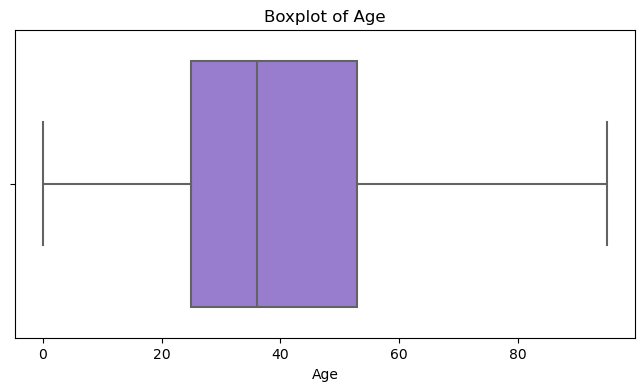

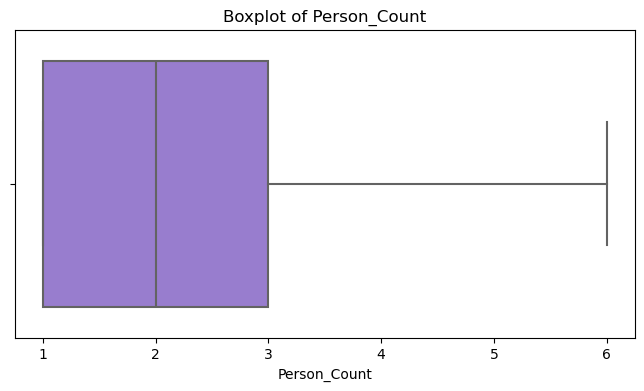

In [146]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=merged_df, x=col, color="mediumpurple")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [155]:
# Function to handle outliers using IQR Capping
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping (Winsorization)
    df[column] = np.where(df[column] < lower_bound, Q1, df[column])
    df[column] = np.where(df[column] > upper_bound, Q3, df[column])

    return df

merged_df = merged_df[merged_df["Age"] >= 0]

# Handle outliers in Age and Person_Count using IQR method
merged_df = handle_outliers_iqr(merged_df, "Age")
merged_df = handle_outliers_iqr(merged_df, "Person_Count")

# Remove negative age values
merged_df = merged_df[merged_df["Age"] >= 0]

# Check if outliers are handled
print("After Handling Outliers:")
print(merged_df[["Age", "Person_Count"]].describe())

After Handling Outliers:
                Age  Person_Count
count  1.786002e+06  1.786002e+06
mean   3.800438e+01  2.087242e+00
std    1.747621e+01  1.240290e+00
min    0.000000e+00  1.000000e+00
25%    2.500000e+01  1.000000e+00
50%    3.600000e+01  2.000000e+00
75%    5.300000e+01  3.000000e+00
max    9.500000e+01  6.000000e+00


#### Detect Outliers in Geospatial Data (Latitude, Longitude)

In [156]:
# IQR outlier detection for Latitude & Longitude
Q1_lat, Q3_lat = merged_df["Latitude"].quantile([0.25, 0.75])
Q1_long, Q3_long = merged_df["Longitude"].quantile([0.25, 0.75])

IQR_lat = Q3_lat - Q1_lat
IQR_long = Q3_long - Q1_long

lower_bound_lat, upper_bound_lat = Q1_lat - 1.5 * IQR_lat, Q3_lat + 1.5 * IQR_lat
lower_bound_long, upper_bound_long = Q1_long - 1.5 * IQR_long, Q3_long + 1.5 * IQR_long

merged_df["Location_Outlier"] = (
    (merged_df["Latitude"] < lower_bound_lat) | (merged_df["Latitude"] > upper_bound_lat) |
    (merged_df["Longitude"] < lower_bound_long) | (merged_df["Longitude"] > upper_bound_long)
).astype(int)

print(f"Geospatial Outliers (IQR Method): {merged_df['Location_Outlier'].sum()} rows")


Geospatial Outliers (IQR Method): 50225 rows


In [157]:
# Remove rows where Location_Outlier == 1
merged_df = merged_df[merged_df["Location_Outlier"] == 0].drop(columns=["Location_Outlier"])

print(f"Dataset after removing outliers: {merged_df.shape}")


Dataset after removing outliers: (1735777, 27)


# Visualization

In [82]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Month,...,Street,Street_Number,Person_Role,Person_Count,Gender,Age,Skin_Color,Profession,Education_Level,Crime_Hour
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,1,...,R JACEGUAI,550,Indicted,4.0,Male,27.0,Brown,Unemployed,2 full degree,11
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,1,...,R MANOEL GUILHERME DOS REIS,641,Victim,1.0,Male,62.0,Brown,Retired,1 full degree,17
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,1,...,R TRES DE MAIO,264,Author,2.0,Male,32.0,White,Nurse,Superior,1
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,1,...,R LEOPOLDO COUTO DE MAGALHAES JR,0,Witness,6.0,Male,66.0,White,Accountant,Superior,13
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,1,...,R JOAO AMARO,439,Victim,3.0,Male,60.0,Yellow,Civil engineer,Superior,1


In [48]:
# Basic info about dataset
print(merged_df.info())

# Missing values check
print(merged_df.isnull().sum())

# Summary statistics for numerical columns
print(merged_df.describe())

# Unique values in categorical columns
for col in ["Department_Name", "Police_Station_Name", "Person_Role"]:
    print(f"{col} unique values:", merged_df[col].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735777 entries, 0 to 1735776
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident_Report_Number       int64  
 1   Year_of_Crime                int64  
 2   Police_Station_ID            int64  
 3   Department_Name              object 
 4   Sectional_Police_Station     object 
 5   Police_Station_Name          object 
 6   Jurisdiction_Department      object 
 7   Jurisdiction_Sectional       object 
 8   Jurisdiction_Police_Station  object 
 9   Month                        int64  
 10  Crime_Date                   object 
 11  Crime_Time                   object 
 12  Case_Status                  object 
 13  Legal_Classification         object 
 14  Crime_Behavior               object 
 15  Latitude                     float64
 16  Longitude                    float64
 17  City                         object 
 18  Street                       object 
 19  

### Crime Trends Over Month

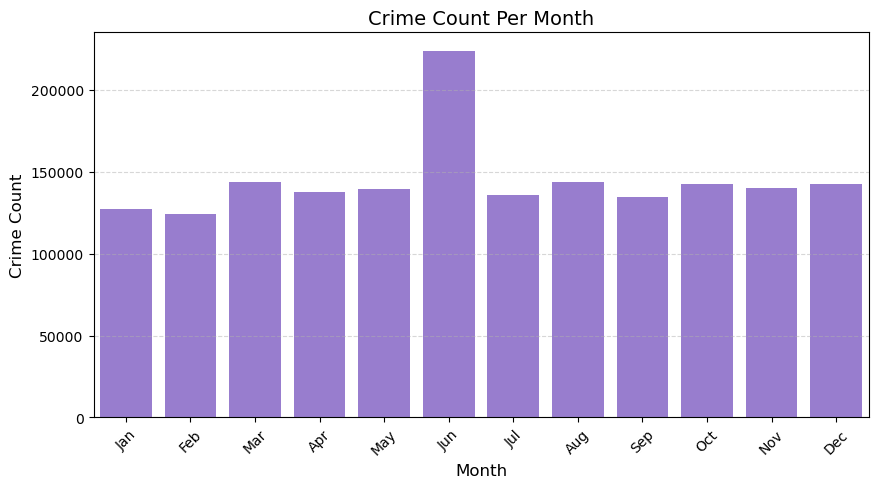

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crimes per month and sort by count (ascending)
month_counts = merged_df["Month"].value_counts().sort_values()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=month_counts.index, y=month_counts.values, color="mediumpurple")

plt.title("Crime Count Per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

# Set month labels in correct order
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


### Crime Trends by Time of Day

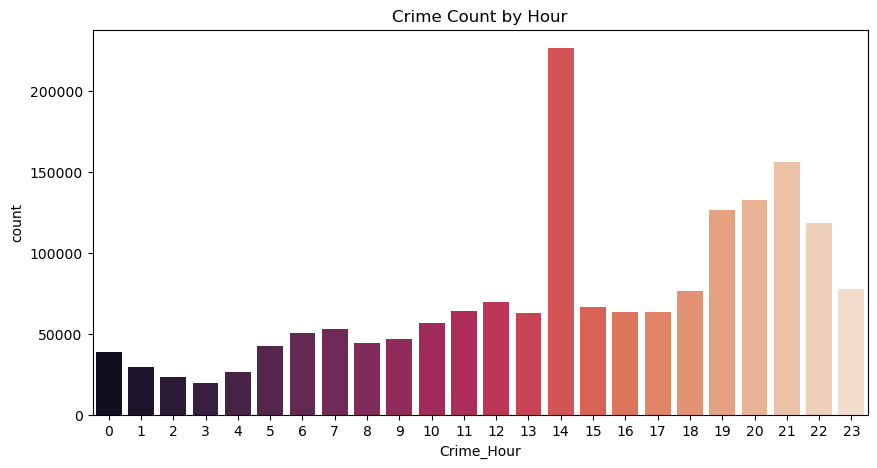

In [142]:
merged_df["Crime_Hour"] = pd.to_datetime(merged_df["Crime_Time"], format="%H:%M:%S", errors="coerce").dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x="Crime_Hour", palette="rocket")
plt.title("Crime Count by Hour")
plt.show()


### Crimes by Police Department

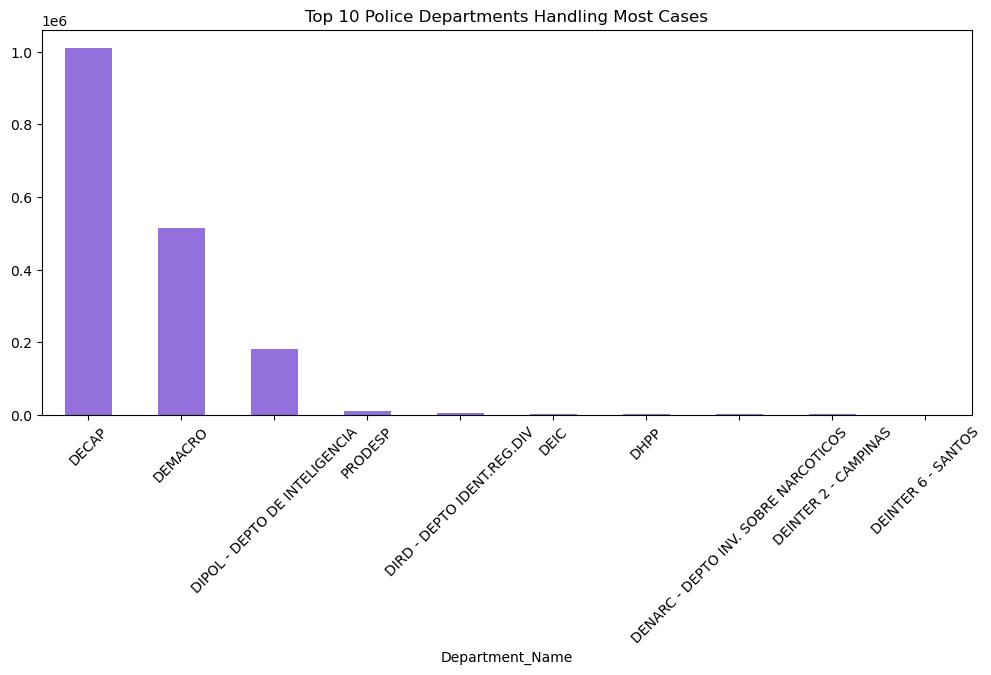

In [141]:
plt.figure(figsize=(12, 5))
merged_df["Department_Name"].value_counts().head(10).plot(kind="bar", color="mediumpurple")
plt.title("Top 10 Police Departments Handling Most Cases")
plt.xticks(rotation=45)
plt.show()

### Analysis of Victim & Suspect Demographics

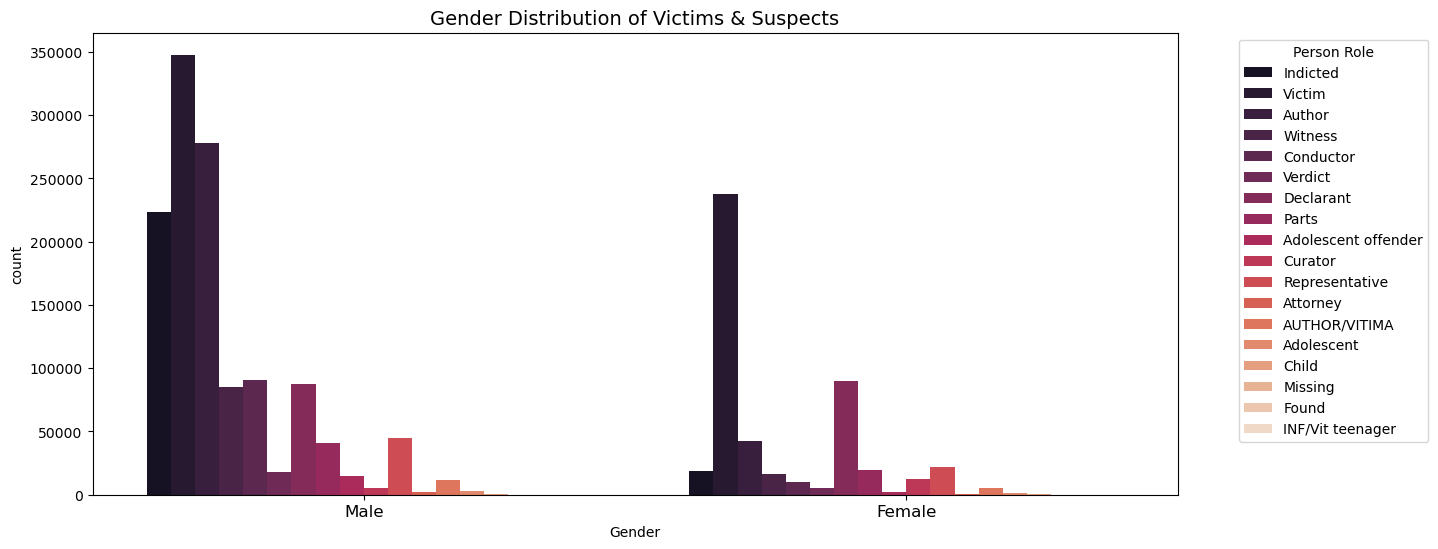

In [140]:
plt.figure(figsize=(14, 6))
sns.countplot(x="Gender", hue="Person_Role", data=merged_df, palette="rocket", dodge=True)
plt.title("Gender Distribution of Victims & Suspects", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title="Person Role", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out
plt.show()


### Age Distribution of Victims & Suspects by Role

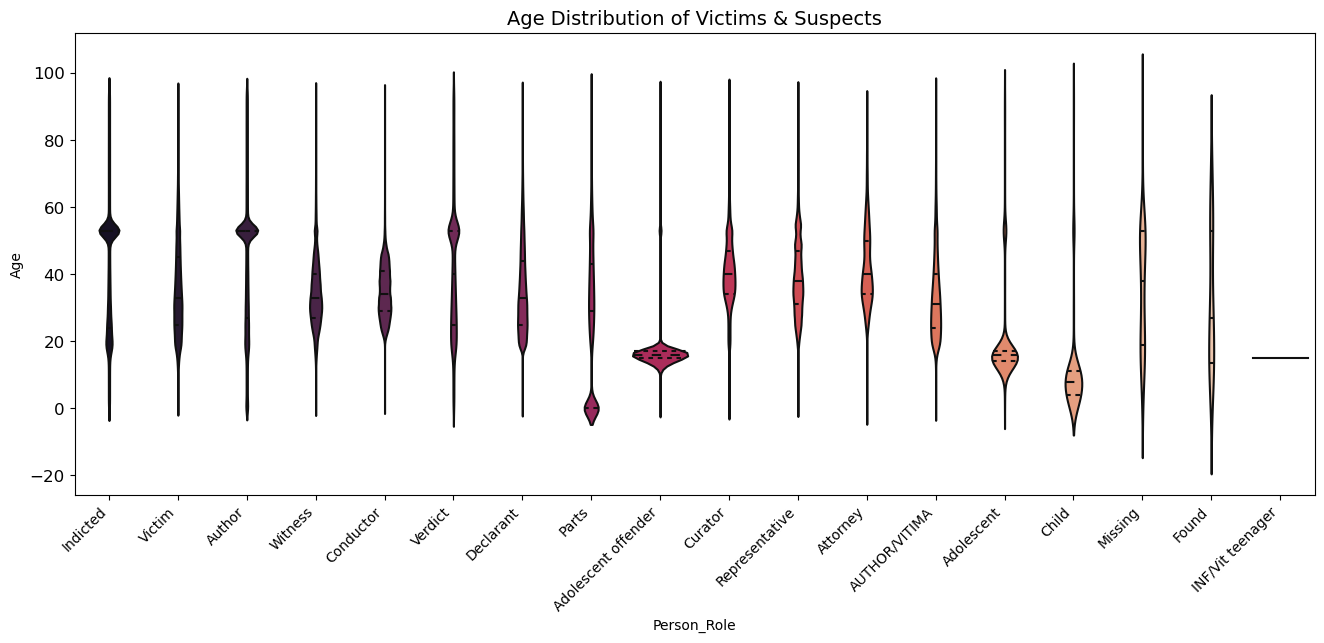

In [53]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="Person_Role", y="Age", data=merged_df, palette="rocket", inner="quartile")

plt.title("Age Distribution of Victims & Suspects", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.show()


### Top 10 Police Stations with the Highest Reported Crimes

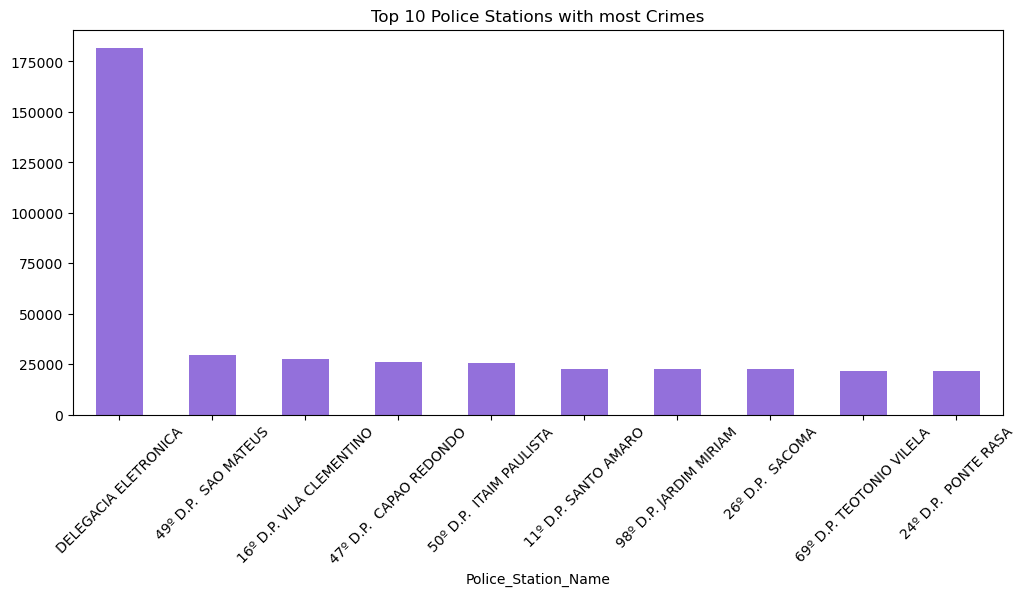

In [139]:
plt.figure(figsize=(12, 5))
merged_df["Police_Station_Name"].value_counts().head(10).plot(kind="bar", color="mediumpurple")
plt.title("Top 10 Police Stations with most Crimes")
plt.xticks(rotation=45)
plt.show()


### Top 10 Most Common Crimes

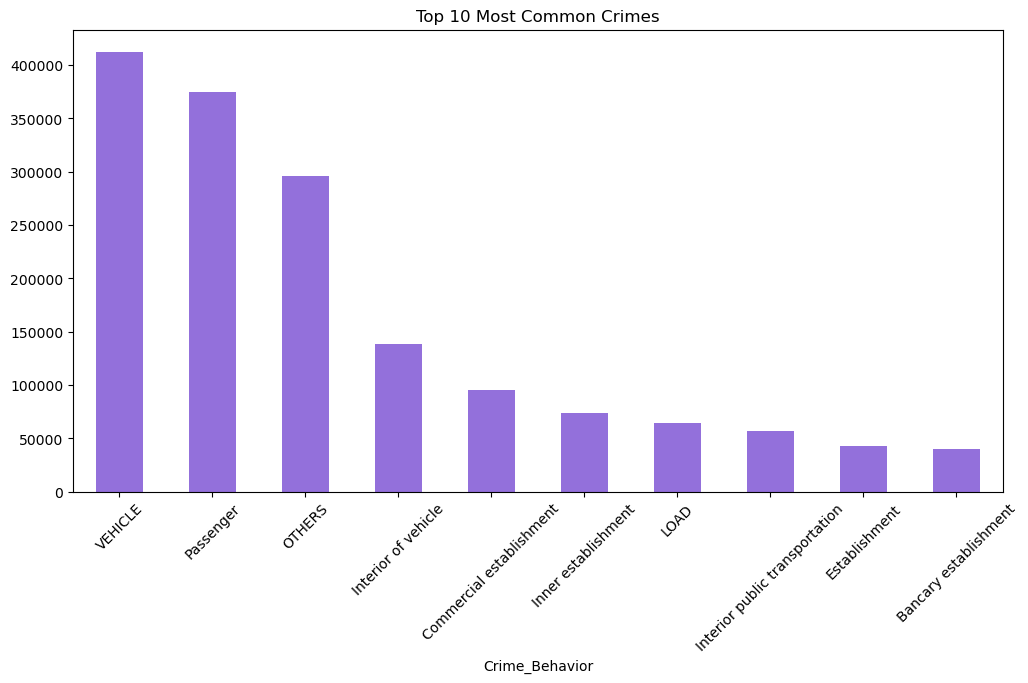

In [138]:
plt.figure(figsize=(12, 6))
merged_df["Crime_Behavior"].value_counts().head(10).plot(kind="bar", color="mediumpurple")
plt.title("Top 10 Most Common Crimes")
plt.xticks(rotation=45)
plt.show()


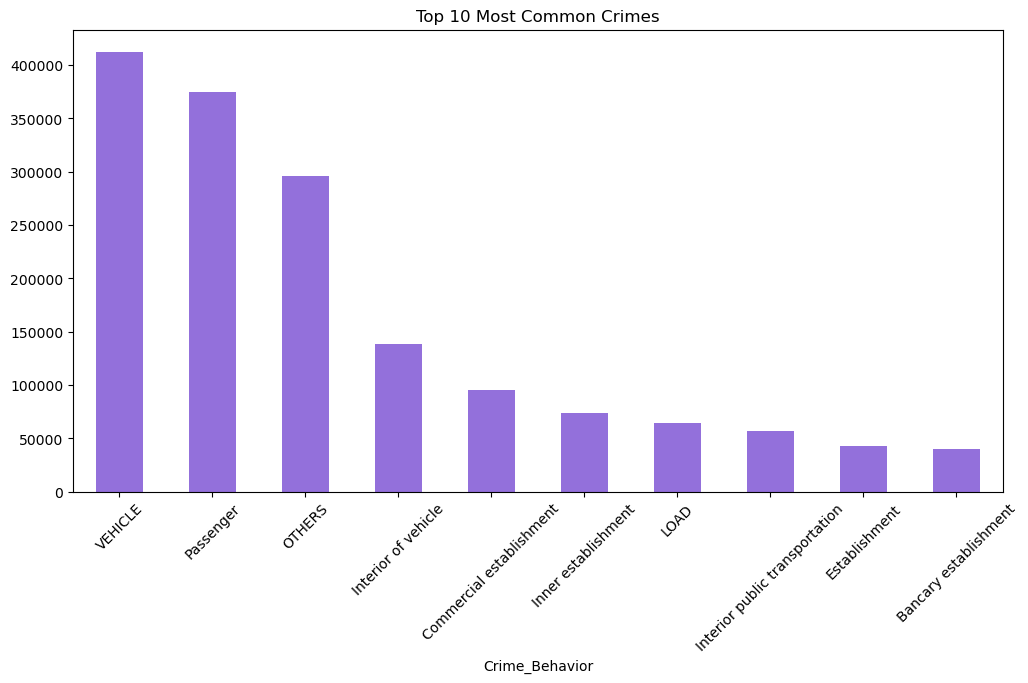

In [137]:
plt.figure(figsize=(12, 6))
merged_df["Crime_Behavior"].value_counts().head(10).plot(kind="bar", color="mediumpurple")
plt.title("Top 10 Most Common Crimes")
plt.xticks(rotation=45)
plt.show()


### High-Risk Areas Based on Reported Cases

In [56]:
pip install folium

In [16]:
import folium
from folium.plugins import HeatMap

# Sample data (first 1000 points for visualization speed)
sample_df = merged_df[["Latitude", "Longitude"]].dropna().sample(1000)

# Create map
crime_map = folium.Map(location=[sample_df["Latitude"].mean(), sample_df["Longitude"].mean()], zoom_start=12)

# Add heatmap
HeatMap(sample_df.values).add_to(crime_map)

crime_map

### Gender-wise Crime Distribution

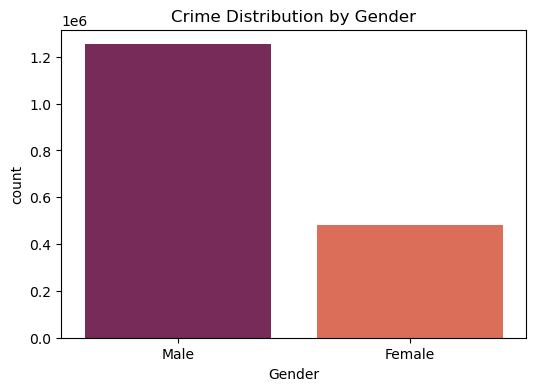

In [126]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="Gender", palette="rocket")
plt.title("Crime Distribution by Gender")
plt.show()


### Age-wise Crime Involvement Distribution

C:\Users\umark\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


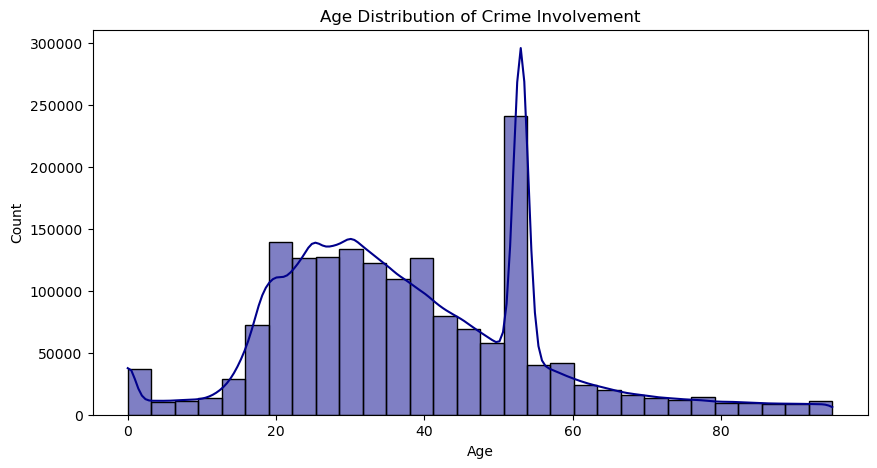

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df["Age"], bins=30, kde=True, color="darkblue")
plt.title("Age Distribution of Crime Involvement")
plt.show()


### Top Cities with Highest Crime

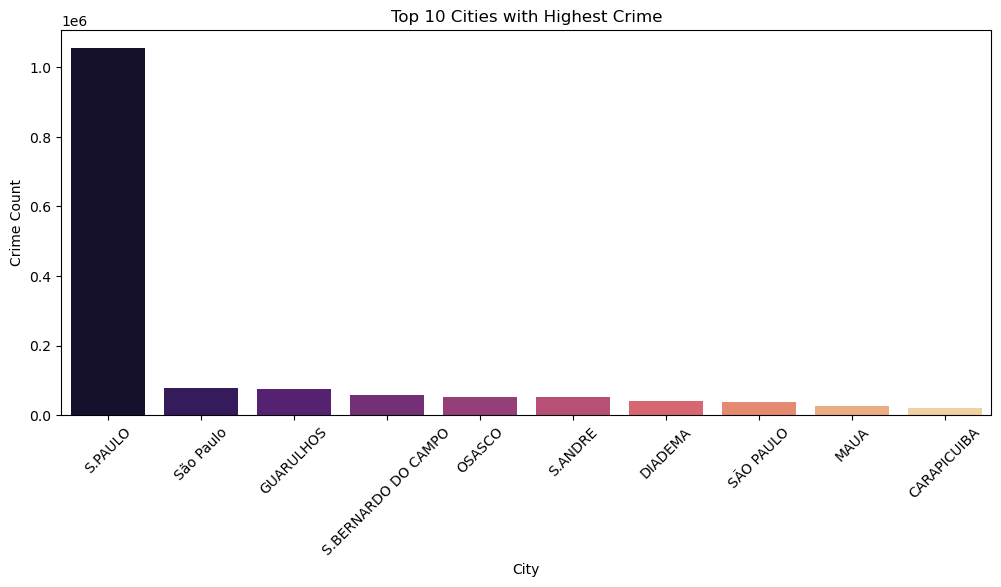

In [59]:
plt.figure(figsize=(12, 5))
top_cities = merged_df["City"].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Crime")
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.show()


### Top Streets with Highest Crime

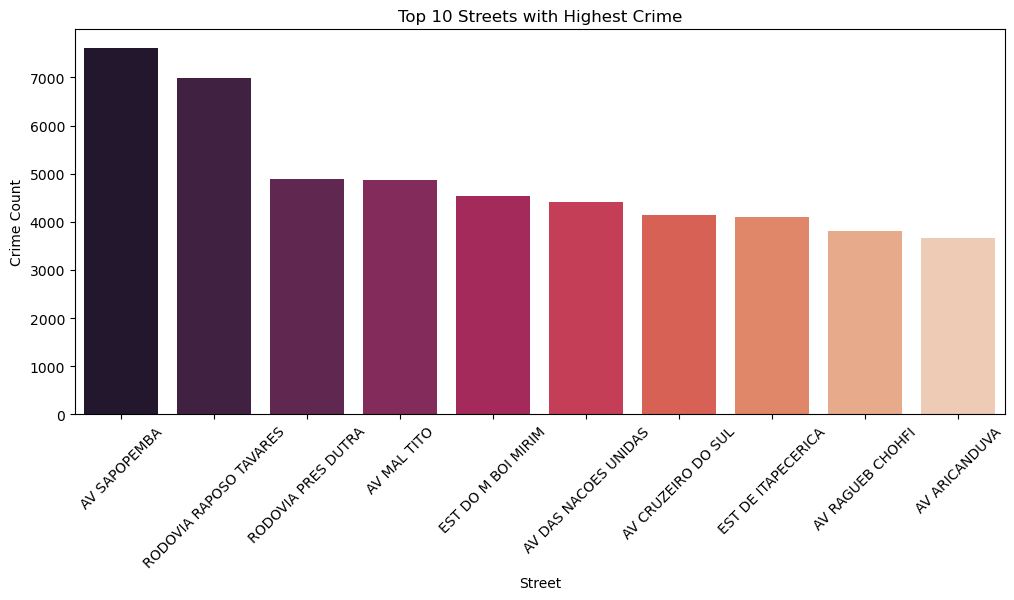

In [60]:
plt.figure(figsize=(12, 5))
top_streets = merged_df["Street"].value_counts().head(10)
sns.barplot(x=top_streets.index, y=top_streets.values, palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 10 Streets with Highest Crime")
plt.xlabel("Street")
plt.ylabel("Crime Count")
plt.show()


### Crime Trend Based on Skin Color

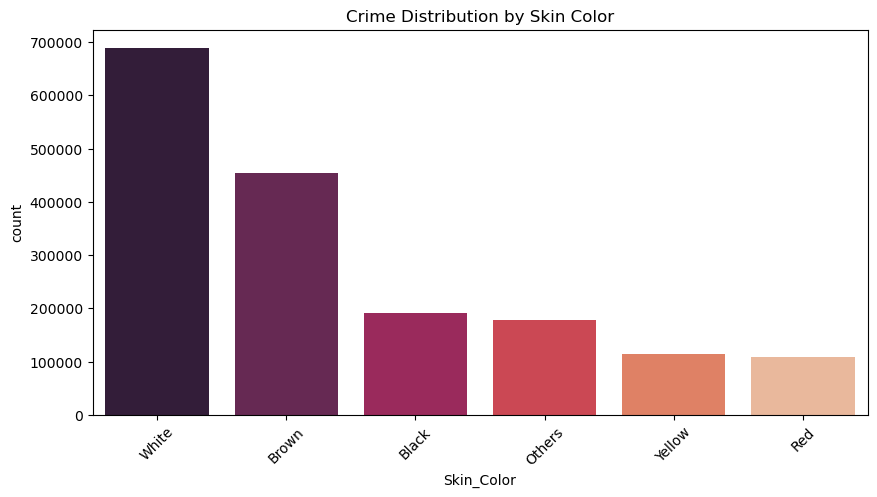

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x="Skin_Color", palette="rocket", order=merged_df["Skin_Color"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Crime Distribution by Skin Color")
plt.show()


### Crime Trend Based on Profession

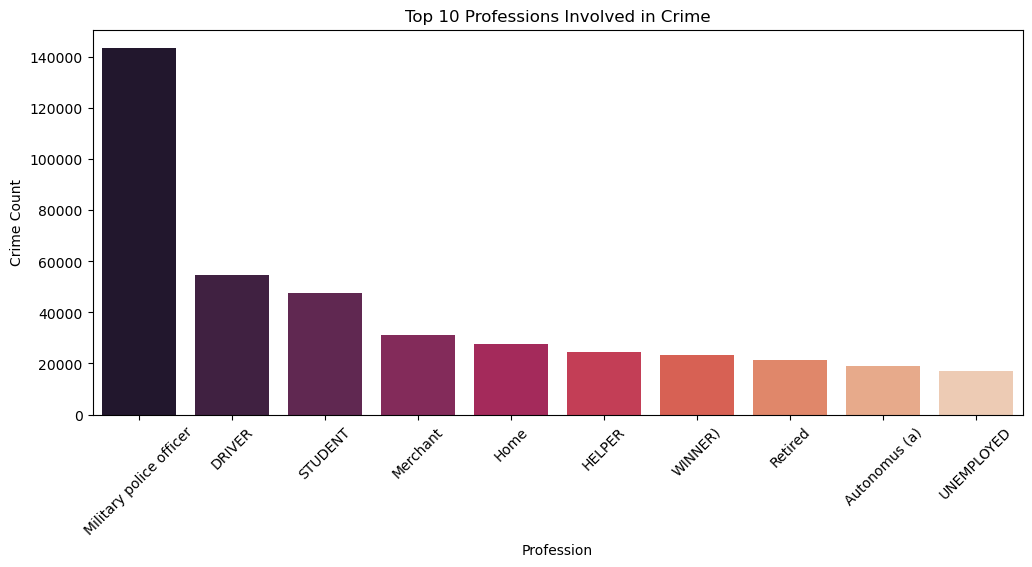

In [113]:
plt.figure(figsize=(12, 5))
top_professions = merged_df["Profession"].value_counts().head(10)
sns.barplot(x=top_professions.index, y=top_professions.values, palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 10 Professions Involved in Crime")
plt.xlabel("Profession")
plt.ylabel("Crime Count")
plt.show()


### Crime Trend Based on Education Level

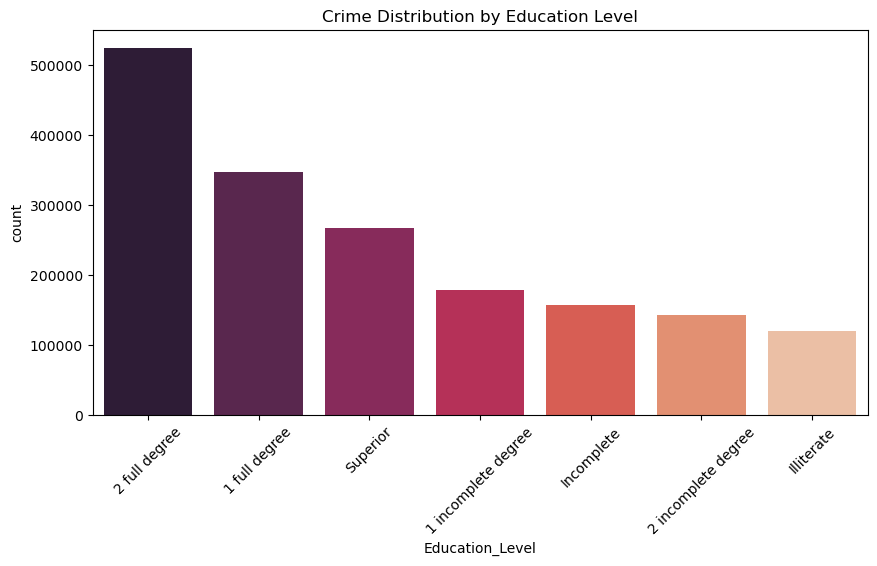

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x="Education_Level", palette="rocket", order=merged_df["Education_Level"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Crime Distribution by Education Level")
plt.show()


### Incident Report Number Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Incident report count per case
incident_counts = merged_df['Incident_Report_Number'].value_counts()

# Average people per case
average_people_per_case = incident_counts.mean()
print(f'Average number of people per case: {average_people_per_case:.2f}')


Average number of people per case: 10.19


In [65]:
# Group by Incident_Report_Number and count persons involved
incident_counts = merged_df.groupby("Incident_Report_Number")["Person_Count"].sum().reset_index()

# Merge with Crime_Behavior to see crime type for top cases
top_incidents = incident_counts.sort_values(by="Person_Count", ascending=False).head(10)
top_incidents = top_incidents.merge(merged_df[["Incident_Report_Number", "Crime_Behavior"]].drop_duplicates(), on="Incident_Report_Number", how="left")

# Print results
print("Top 10 cases with the most people involved along with Crime Behavior:")
print(top_incidents)


Top 10 cases with the most people involved along with Crime Behavior:
     Incident_Report_Number  Person_Count                  Crime_Behavior
0                         3        1140.0                          OTHERS
1                         3        1140.0                       Passenger
2                         3        1140.0                         JEWELRY
3                         3        1140.0                         VEHICLE
4                         3        1140.0        Commercial establishment
..                      ...           ...                             ...
135                      21         811.0             Inner establishment
136                      21         811.0                   Establishment
137                      21         811.0          Commercial condominium
138                      21         811.0  Interior public transportation
139                      21         811.0           Bancary establishment

[140 rows x 3 columns]


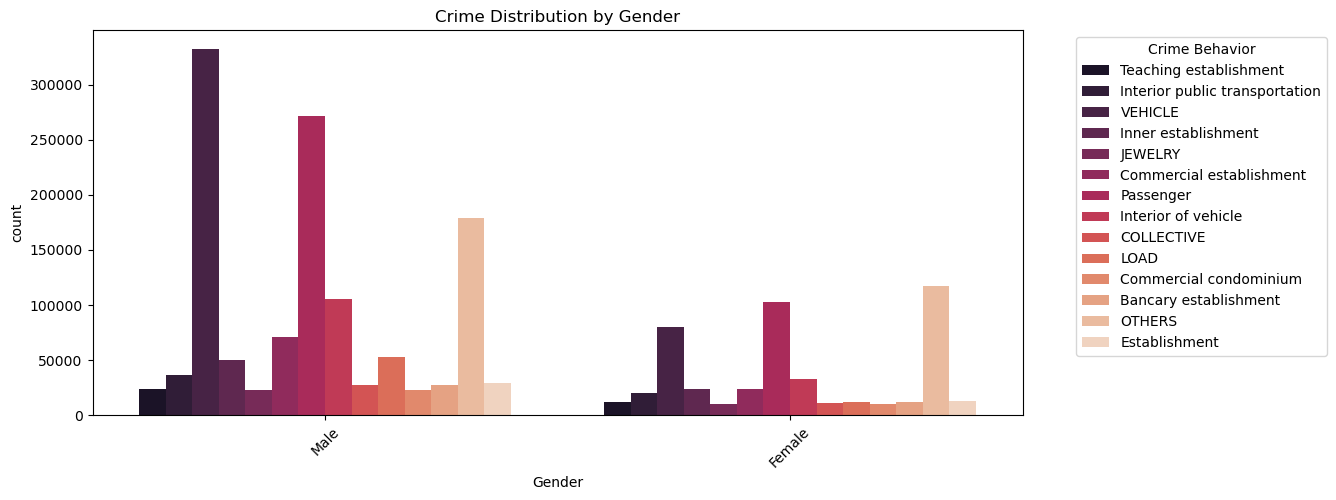

In [115]:
plt.figure(figsize=(12, 5))
sns.countplot(x="Gender", hue="Crime_Behavior", data=merged_df, palette="rocket")
plt.title("Crime Distribution by Gender")
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Crime Behavior", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Feature Engineering

In [69]:
import pandas as pd
merged_df = pd.read_csv('cleaned_data.csv')

In [83]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Month,...,Street,Street_Number,Person_Role,Person_Count,Gender,Age,Skin_Color,Profession,Education_Level,Crime_Hour
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,1,...,R JACEGUAI,550,Indicted,4.0,Male,27.0,Brown,Unemployed,2 full degree,11
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,1,...,R MANOEL GUILHERME DOS REIS,641,Victim,1.0,Male,62.0,Brown,Retired,1 full degree,17
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,1,...,R TRES DE MAIO,264,Author,2.0,Male,32.0,White,Nurse,Superior,1
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,1,...,R LEOPOLDO COUTO DE MAGALHAES JR,0,Witness,6.0,Male,66.0,White,Accountant,Superior,13
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,1,...,R JOAO AMARO,439,Victim,3.0,Male,60.0,Yellow,Civil engineer,Superior,1


In [88]:
import numpy as np
import pandas as pd

# Ensure Crime_Hour is integer
merged_df["Crime_Hour"] = merged_df["Crime_Hour"].astype(int)

# 1️⃣ Crime_Period Feature
merged_df["Crime_Period"] = np.where(merged_df["Crime_Hour"] > 18, "Night", "Day")

# 3️⃣ Repeat_Offender Feature (Flag if a person appears multiple times)
repeat_offender_counts = merged_df["Incident_Report_Number"].value_counts()
merged_df["Repeat_Offender"] = merged_df["Incident_Report_Number"].map(lambda x: 1 if repeat_offender_counts[x] > 1 else 0)

# 4️⃣ Crime_Severity Feature (Based on number of persons involved)
merged_df["Crime_Severity"] = pd.cut(merged_df["Person_Count"], bins=[0, 1, 3, np.inf], labels=["Low", "Moderate", "High"])

# Display the new features added
print(merged_df[["Crime_Hour", "Crime_Period", "Repeat_Offender", "Crime_Severity"]].head())


   Crime_Hour Crime_Period  Repeat_Offender Crime_Severity
0          11          Day                1           High
1          17          Day                1            Low
2           1          Day                1       Moderate
3          13          Day                1           High
4           1          Day                1       Moderate


In [90]:
import pandas as pd

# Step 1: Ensure Crime_Date is in datetime format
if 'Crime_Date' not in merged_df.columns:
    merged_df['Crime_Date'] = pd.to_datetime(
        merged_df[['Year_of_Crime', 'Month']].assign(Day=1), errors='coerce'
    )

# Step 2: Convert to datetime format if needed
merged_df['Crime_Date'] = pd.to_datetime(merged_df['Crime_Date'], errors='coerce')

# Step 3: Extract Day_of_Week
merged_df['Day_of_Week'] = merged_df['Crime_Date'].dt.day_name()

# Step 4: Check unique values
print(merged_df['Day_of_Week'].unique())


['Tuesday' 'Saturday' 'Friday' 'Thursday' 'Sunday' 'Monday' 'Wednesday']


In [106]:
bins = [0, 18, 30, 45, 60, 100]  # Define bin edges
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

In [107]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Month,...,Age,Skin_Color,Profession,Education_Level,Crime_Hour,Crime_Period,Repeat_Offender,Crime_Severity,Day_of_Week,Age_Group
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,1,...,27.0,Brown,Unemployed,2 full degree,11,Day,1,High,Tuesday,Young Adult
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,1,...,62.0,Brown,Retired,1 full degree,17,Day,1,Low,Saturday,Senior
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,1,...,32.0,White,Nurse,Superior,1,Day,1,Moderate,Tuesday,Adult
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,1,...,66.0,White,Accountant,Superior,13,Day,1,High,Tuesday,Senior
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,1,...,60.0,Yellow,Civil engineer,Superior,1,Day,1,Moderate,Tuesday,Middle Aged


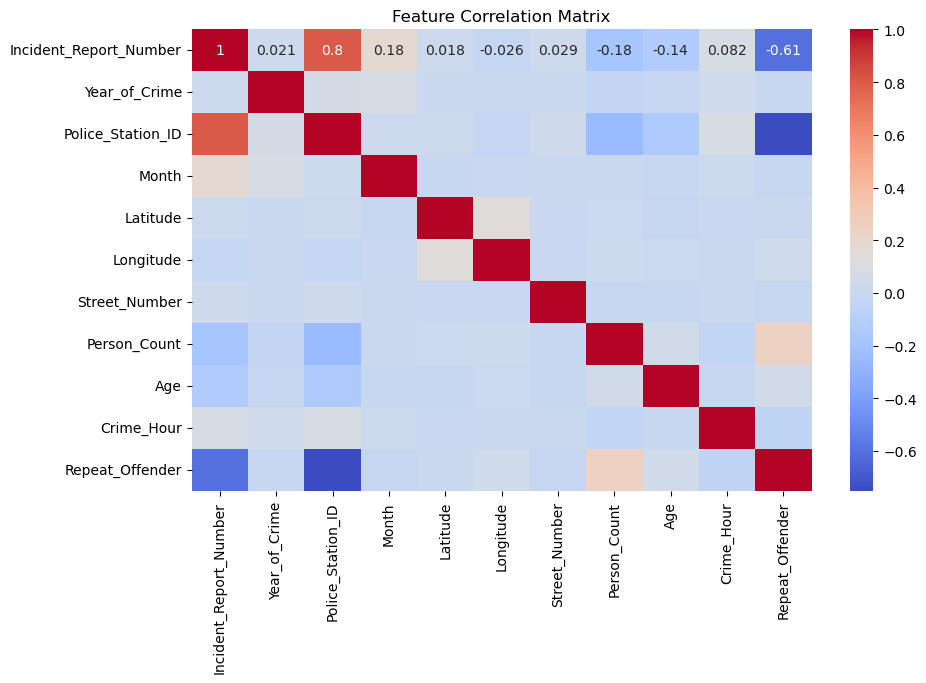

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = merged_df.select_dtypes(include=["number"])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Matrix")
plt.show()


In [98]:
merged_df.to_csv("cleaned_data.csv", index=False)
print("File saved successfully!")

File saved successfully!


### Day-wise Trends

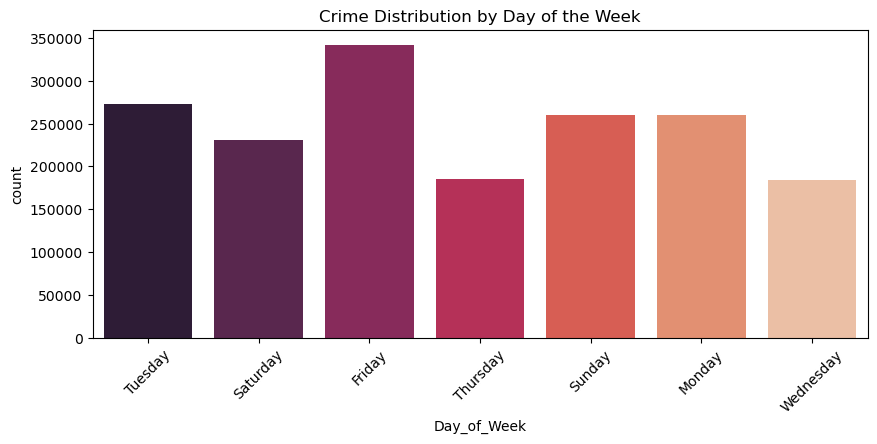

In [123]:
plt.figure(figsize=(10, 4))
sns.countplot(data=merged_df, x="Day_of_Week", palette="rocket")
plt.title("Crime Distribution by Day of the Week")
plt.xticks(rotation=45)
plt.show()


### Crime Behavior by Age Group

C:\Users\umark\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


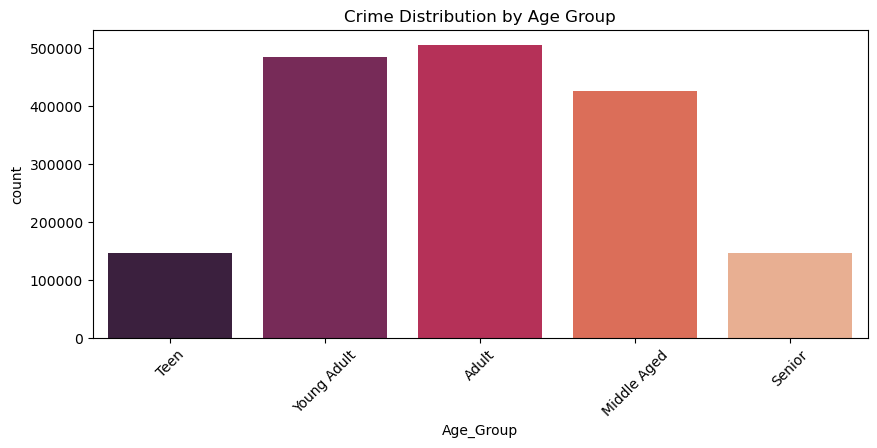

In [121]:
plt.figure(figsize=(10, 4))
sns.countplot(data=merged_df, x="Age_Group", palette="rocket")
plt.title("Crime Distribution by Age Group")
plt.xticks(rotation=45)
plt.show()


### Crime Period

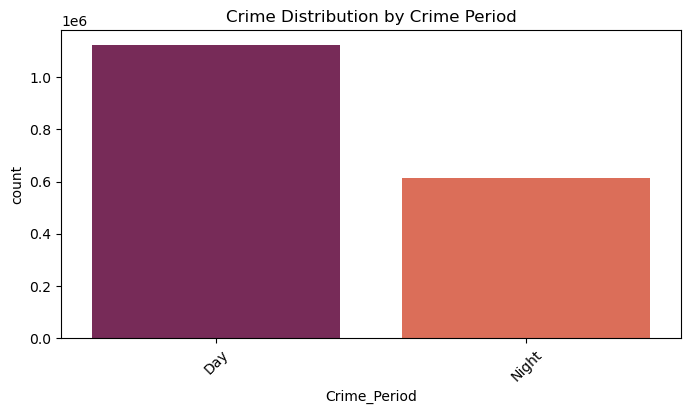

In [119]:
plt.figure(figsize=(8, 4))
sns.countplot(data=merged_df, x="Crime_Period", palette="rocket")
plt.title("Crime Distribution by Crime Period")
plt.xticks(rotation=45)
plt.show()


In [111]:
merged_df.head()

,Incident_Report_Number,Year_of_Crime,Police_Station_ID,Department_Name,Sectional_Police_Station,Police_Station_Name,Jurisdiction_Department,Jurisdiction_Sectional,Jurisdiction_Police_Station,Month,...,Age,Skin_Color,Profession,Education_Level,Crime_Hour,Crime_Period,Repeat_Offender,Crime_Severity,Day_of_Week,Age_Group
0,1,2013,10115,DECAP,DEL.SEC.1º CENTRO,CENTRAL DE FLAGRANTES 1ªSEC II,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,1,...,27.0,Brown,Unemployed,2 full degree,11,Day,1,High,Tuesday,Young Adult
1,1,2013,10212,DECAP,DEL.SEC.6º SANTO AMARO,DEL.PROTECAO IDOSO- 6ª SEC.,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,1,...,62.0,Brown,Retired,1 full degree,17,Day,1,Low,Saturday,Senior
2,1,2013,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,1,...,32.0,White,Nurse,Superior,1,Day,1,Moderate,Tuesday,Adult
3,1,2013,10315,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,DECAP,DEL.SEC.3º OESTE,15º D.P. DR. LUC. H BEIGUELMAN,1,...,66.0,White,Accountant,Superior,13,Day,1,High,Tuesday,Senior
4,1,2013,10330,DECAP,DEL.SEC.2º SUL,27º D.P. IBIRAPUERA,DECAP,DEL.SEC.2º SUL,96º D.P. MONÇÕES,1,...,60.0,Yellow,Civil engineer,Superior,1,Day,1,Moderate,Tuesday,Middle Aged
